In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightkurve as lk
from tessifystarspot import *

In [2]:
lc = lk.search_lightcurve('TIC 122365299', sector=14).download()
time = lc.time.value

/home/isy/aur/miniconda3/lib/python3.8/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [3]:
sample_size = 50

In [4]:
injected_periods = np.arange(sample_size) + 1
fluxes = np.zeros((sample_size, len(time)))
days = 1
for s in range(sample_size): 
    fluxes[s,:] = np.sin(2 * np.pi * time / days)
    days += 1

In [33]:
# 50% amplitude
fluxes_lowA = np.zeros((sample_size, len(time)))
days = 1
for s in range(sample_size): 
    fluxes_lowA[s,:] = 0.5 * np.sin(2 * np.pi * time / days)
    days += 1

In [5]:
ls = np.zeros(sample_size)
acf = np.zeros(sample_size)
ls_lowA = np.zeros(sample_size)
acf_lowA = np.zeros(sample_size)
tess_cadence = 1/24/2

In [17]:
for s in range(sample_size):
    lc = lk.LightCurve(time=time, flux=fluxes[s,:])
    ls[s] = lc.to_periodogram(oversample_factor=100).period_at_max_power.value
    acf[s] = acf_rotation(lc, tess_cadence)

/home/isy/aur/miniconda3/lib/python3.8/site-packages/astropy-4.2-py3.8-linux-x86_64.egg/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<IPython.core.display.Javascript object>


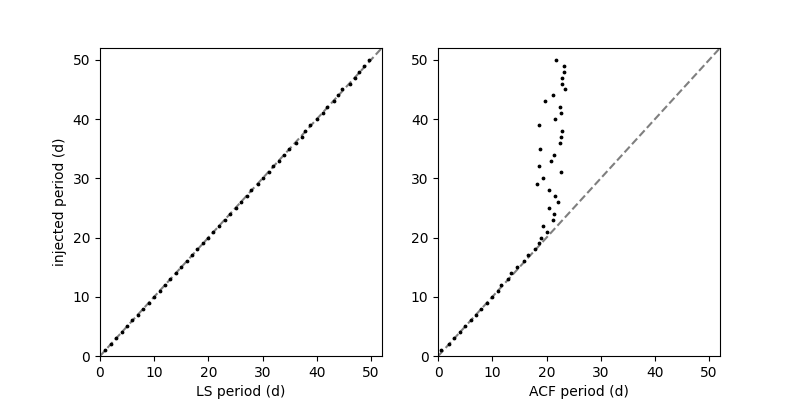

In [18]:
%matplotlib notebook
fig, ax = plt.subplots(1,2)

oneone = np.arange(60)

ax[0].plot(oneone, oneone, 'k--', alpha=0.5)
ax[0].scatter(ls, injected_periods, c='k', s=3)
ax[0].set(xlim=(0,52), ylim=(0,52), xlabel='LS period (d)', ylabel='injected period (d)')

ax[1].plot(oneone, oneone, 'k--', alpha=0.5)
ax[1].scatter(acf, injected_periods, c='k', s=3)
ax[1].set(xlim=(0,52), ylim=(0,52), xlabel='ACF period (d)')

fig.set_size_inches(8,4)

<IPython.core.display.Javascript object>


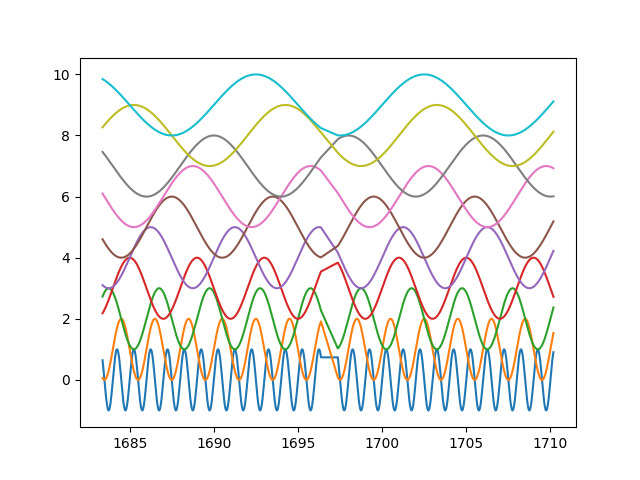

In [12]:
# this was just for a sanity check

%matplotlib notebook
# plt.plot(time, fluxes[0,:])

offset = 0
for s in range(10):
    plt.plot(time, fluxes[s,:]+offset)
    offset += 1